---
---

<h1 align='center'> Anamoly Detection </h1>
<h2 align='center'> Transfer-Learning Models</h2> 


*   ML[Smote(Bert features extracted from pretrained model)]
*   Bert+NN full trainable

>**Need to do before running this code:** `have the clean_data.csv file uploaded`

>**First Phase: Bert Feature Extraction** 
>>After installing all the dependencies, Run the code 
* `[1st]` hyperlink works in colab and `[2nd]` hyperlink works in jupyter
* from: [START-CELL](#scrollTo=896885c2-3bf0-49bf-a75f-0018ec2104f9) `or` [START-CELL](#Import-Libraries) --> `Import Packages Cell` 
* to: [END-CELL](#scrollTo=d007b732-7657-48af-ae3c-daa0210d3031) `or` [END-CELL](#Transfer-Learning-Approches) --> `Cell before #Transfer Learning Approches` 
* untill u get 100% features extracted for all the data sentences. 
* Download and keep local copy of the BertFeatures.csv for safty.

>**Second Phase: ML algorithims on Bert-Features** 

---
---

## *Dependencies*
Install these dependencies only once into your environment

In [1]:
#!pip3 install tensorflow_text
#!pip3 install tensorflow_hub
#!pip3 install tensorflow-gpu
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

## *Import Libraries*
Make sure your 'clean_data' is uploaded into the workspace

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
if (len(tf.config.list_physical_devices('GPU'))!=0):
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

import warnings
warnings.filterwarnings('ignore')

## Read File

In [3]:
import pandas as pd
data = pd.read_csv("cleaned_data.csv")

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

In [4]:
#Print the dataframe
data.head()

,X_data,Y_data
0,1 81109 203518 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 19 102 54106 dest 10 250 19 102 50010 E5 Receiving block src dest,0
1,2 81109 203518 35 INFO dfs FSNamesystem BLOCK NameSystem allocateBlock mnt hadoop mapred system job2008110920300001 job jar blk1608999687919862906 E22 BLOCK NameSystem allocateBlock,0
2,3 81109 203519 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 10 6 40524 dest 10 250 10 6 50010 E5 Receiving block src dest,0
3,4 81109 203519 145 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 14 224 42420 dest 10 250 14 224 50010 E5 Receiving block src dest,0
4,5 81109 203519 145 INFO dfs DataNode PacketResponder PacketResponder 1 for block blk1608999687919862906 terminating E11 PacketResponder for block terminating,0


In [5]:
# run this cell block only once
# in the cleaned data, first word is index, which we dont require as a data input
data['X_data'] = data['X_data'].apply(lambda s: s.split(' ', 1)[1])

In [6]:
#Print the dataframe
data

,X_data,Y_data
0,81109 203518 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 19 102 54106 dest 10 250 19 102 50010 E5 Receiving block src dest,0
1,81109 203518 35 INFO dfs FSNamesystem BLOCK NameSystem allocateBlock mnt hadoop mapred system job2008110920300001 job jar blk1608999687919862906 E22 BLOCK NameSystem allocateBlock,0
2,81109 203519 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 10 6 40524 dest 10 250 10 6 50010 E5 Receiving block src dest,0
3,81109 203519 145 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 14 224 42420 dest 10 250 14 224 50010 E5 Receiving block src dest,0
4,81109 203519 145 INFO dfs DataNode PacketResponder PacketResponder 1 for block blk1608999687919862906 terminating E11 PacketResponder for block terminating,0
...,...,...
104810,81109 210122 13 INFO dfs DataBlockScanner Verification succeeded for blk8738709778586756237 E2 Verification succeeded for,0
104811,81109 210124 13 INFO dfs DataBlockScanner Verification succeeded for blk6420476111425645508 E2 Verification succeeded for,0
104812,81109 210126 13 INFO dfs DataBlockScanner Verification succeeded for blk2382389751032389929 E2 Verification succeeded for,0
104813,81109 210126 13 INFO dfs DataBlockScanner Verification succeeded for blk4856031730010032819 E2 Verification succeeded for,0


## Exploratory Data Analysis

        X_data
Y_data        
0       101544
1       3271  


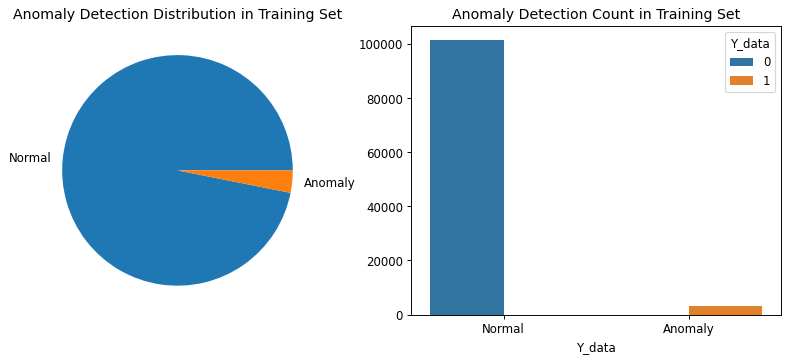

In [7]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=85)
plt.tight_layout()

distribution = data.groupby('Y_data').count()
print(distribution)
distribution['X_data'].plot(kind='pie', ax=axes[0], labels=['Normal', 'Anomaly'])
sns.countplot(x=data['Y_data'], hue=data['Y_data'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Normal', 'Anomaly'])
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

axes[0].set_title('Anomaly Detection Distribution in Training Set', fontsize=12)
axes[1].set_title('Anomaly Detection Count in Training Set', fontsize=12)

plt.show()

## **Bert Models** (*Hugging Face*)

In [8]:
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

print('Available Pretrained Models:',*list(map_name_to_handle.keys()), sep = "\n")

Available Pretrained Models:
bert_en_uncased_L-12_H-768_A-12
bert_en_cased_L-12_H-768_A-12
bert_multi_cased_L-12_H-768_A-12
small_bert/bert_en_uncased_L-2_H-128_A-2
small_bert/bert_en_uncased_L-2_H-256_A-4
small_bert/bert_en_uncased_L-2_H-512_A-8
small_bert/bert_en_uncased_L-2_H-768_A-12
small_bert/bert_en_uncased_L-4_H-128_A-2
small_bert/bert_en_uncased_L-4_H-256_A-4
small_bert/bert_en_uncased_L-4_H-512_A-8
small_bert/bert_en_uncased_L-4_H-768_A-12
small_bert/bert_en_uncased_L-6_H-128_A-2
small_bert/bert_en_uncased_L-6_H-256_A-4
small_bert/bert_en_uncased_L-6_H-512_A-8
small_bert/bert_en_uncased_L-6_H-768_A-12
small_bert/bert_en_uncased_L-8_H-128_A-2
small_bert/bert_en_uncased_L-8_H-256_A-4
small_bert/bert_en_uncased_L-8_H-512_A-8
small_bert/bert_en_uncased_L-8_H-768_A-12
small_bert/bert_en_uncased_L-10_H-128_A-2
small_bert/bert_en_uncased_L-10_H-256_A-4
small_bert/bert_en_uncased_L-10_H-512_A-8
small_bert/bert_en_uncased_L-10_H-768_A-12
small_bert/bert_en_uncased_L-12_H-128_A-2
small

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Choose the Model: 
# as our data is Cased (with lower and caps letters), we cased bert model
bert_model_name = 'bert_en_cased_L-12_H-768_A-12' 

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

#tf.compat.v1.disable_eager_execution()
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess', trainable=False)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder, name='encoder', trainable=False)

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3


## Feature Extraction

In [10]:
# this block needs to be mannually done
import os

if os.path.exists("iters.npy"):
  print("Loaded Previously saved series of iteration starts")
  srt = list(np.load('iters.npy'))
else:
  print("Unable to find saved series file, Starting from stratch (zero)")
  srt = [0] # reset
if os.path.exists("BertFeatures.csv"):
  print("Saved Bert Features file found!")
  with open("BertFeatures.csv",'r') as f:
    last_line_no = len(f.readlines())
    if last_line_no != srt[-1]:
      print("\nSaved Bert Features last line no. doesnt match iteration log,\n\
Execution might have abruptly interupted in previous runtime\n\
So adding last line no. into iteration log.")
      srt.append(last_line_no)

Loaded Previously saved series of iteration starts
Saved Bert Features file found!


In [11]:
print("started from i-values:",srt)

started from i-values: [0, 1943]


In [ ]:
from tqdm import tqdm
import csv
import psutil

thresh = 500
if len(srt) == 1: 
  mode = 'w'
else:
  mode = 'a'

with open("BertFeatures.csv",mode) as f:
  writer = csv.writer(f, delimiter=',', lineterminator='\n')
  
  for i in tqdm(range(len(data['X_data']))):
    if i<srt[-1]:
      continue
    
    if (i%thresh==0):
      tf.keras.backend.clear_session()
    # clear tensorflow ram when it exceeds 95 percent of ram usage
    # restart the runtime for faster performance:
    if psutil.virtual_memory().percent > 95:
      tf.keras.backend.clear_session()
      srt.append(i)
      np.save('iters.npy',srt);
      break
    
    j = data['X_data'][i]
    # bert window size = 1, as each sentence is featurized independently
    bert_results = bert_encoder(bert_preprocess([j]))
    bert_out = bert_results["pooled_output"].numpy()[0]
    writer.writerow(bert_out)

  3%|██                                                                        | 2981/104815 [04:45<8:36:53,  3.28it/s]

In [12]:
#Checking Saved Bert Features
features = pd.read_csv("BertFeatures.csv",header=None) 
features.shape

(1943, 768)

---
# **Transfer Learning Approches**
*restart the kernel for faster run-time as features are extracted from bert transformer and saved*

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

x = pd.read_csv("BertFeatures.csv")
import pandas as pd
data = pd.read_csv("cleaned_data.csv")
y = data['Y_data'].apply(lambda x: -1 if x == 0 else 1)

### ***Solving Data Imbalance***

In [ ]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', x.shape)
print('Resample dataset shape', x_smote.shape)
SmoteData = x_smote.copy()
SmoteData['Y_data'] = y_smote
SmoteData.groupby('Y_data').count()

---
<h2 align='center'> --> ML models with Hyper-parameter tuning <-- </h2>
    
---

### Train/Test/Validation Data-Split

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_features, test_features, train_labels, test_labels = train_test_split(x_smote, y_smote,
                                                                            random_state=2022, 
                                                                            test_size=0.2)

class_names = ['Normal','Anomaly']

#### *Searching for the best model*
These above features-data is given as inputs for ML-Classifiers and best out them is found

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDOneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names = ["Lin OneClassSVM", "Poly OneClassSVM", "RBF OneClassSVM", 
         "Sig OneClassSVM", "Lin OneClassSVM - SGD", "LOF", "IsolationForest", 
         "Lin SVM", "Poly SVM", "RBF SVM", "Sig SVM", "lbfgs Log-Reg", 
         "saga Log-Reg", "SGD", "Naive Bayes", "Gaussian Process", "Decision Tree", 
         "Random Forest", "KNN", "GradientBoostingClassifier", "Neural Net", 
         "AdaBoost", "QDA", "LGBM", "XGB"]

classifiers = [OneClassSVM(kernel='linear',max_iter=10000), OneClassSVM(kernel='poly',max_iter=10000), 
               OneClassSVM(kernel='rbf',max_iter=10000), OneClassSVM(kernel='sigmoid',max_iter=10000),
               SGDOneClassSVM(max_iter=10000), LocalOutlierFactor(novelty=True), IsolationForest(),
               SVC(kernel='linear',max_iter=10000), SVC(kernel='poly',max_iter=10000), 
               SVC(kernel='rbf',max_iter=10000), SVC(kernel='sigmoid',max_iter=10000),
               LogisticRegression(solver='lbfgs'), LogisticRegression(solver='saga'), SGDClassifier(), 
               GaussianNB(), GaussianProcessClassifier(), DecisionTreeClassifier(max_depth=25), 
               RandomForestClassifier(max_depth=25), KNeighborsClassifier(), GradientBoostingClassifier(max_depth=5),
               MLPClassifier(max_iter=2500,early_stopping=True), AdaBoostClassifier(), 
               QuadraticDiscriminantAnalysis(), LGBMClassifier(), XGBClassifier()]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

def runML():
    for i in range(len(class_names)):
        if (i == 0):
            ii = -1
        else:
            ii = 1
        print("CLASS - (",ii,") -->",class_names[i])

    fig = plt.figure(figsize=(18,20))
    fig.tight_layout()
    nof_clsfrs = len(names)
    Metrics = {}
    
    print('\nClassification Report for each Classifier:')
    for i in range(nof_clsfrs):
        metric = []
        classifier = classifiers[i]
        plt.subplot(nof_clsfrs/5,5,i+1)
        plt.xticks([])
        plt.yticks([])
    
        print(f'\n\nClassifier: {str(classifier)[:30]}...')
        start_time = time.time(); classifier.fit(train_features, train_labels); metric.append(time.time() - start_time); 
        start_time = time.time(); test_pred = classifier.predict(test_features); metric.append(time.time() - start_time);
        acc = accuracy_score(test_labels,test_pred) *100; metric.append(acc);
        Metrics[names[i]] = metric
        #print(f'Accuracy  is {acc}%, Report:')
        print(classification_report(test_labels, test_pred))
    
        plt.gca().set_title(names[i])
        CM = confusion_matrix(test_labels, test_pred)
        plt.imshow(CM,interpolation='nearest',cmap='summer')
        for (i, j), z in np.ndenumerate(CM):
            plt.text(j, i, z, ha='center', va='center')
        plt.xticks(np.arange(len(class_names)),class_names, fontsize=8)
        plt.yticks(np.arange(len(class_names)))
        plt.grid(False)
    plt.show()
    return Metrics

#### *Fitting and Ploting results*

CLASS - ( -1 ) --> Normal
CLASS - ( 1 ) --> Anomaly

Classification Report for each Classifier:


Classifier: OneClassSVM(kernel='linear', m...
              precision    recall  f1-score   support

          -1       0.50      0.51      0.50       377
           1       0.52      0.51      0.52       396

    accuracy                           0.51       773
   macro avg       0.51      0.51      0.51       773
weighted avg       0.51      0.51      0.51       773



Classifier: OneClassSVM(kernel='poly', max...
              precision    recall  f1-score   support

          -1       0.49      0.50      0.50       377
           1       0.52      0.51      0.51       396

    accuracy                           0.51       773
   macro avg       0.51      0.51      0.51       773
weighted avg       0.51      0.51      0.51       773



Classifier: OneClassSVM(max_iter=10000)...
              precision    recall  f1-score   support

          -1       0.54      0.59      0.57       377


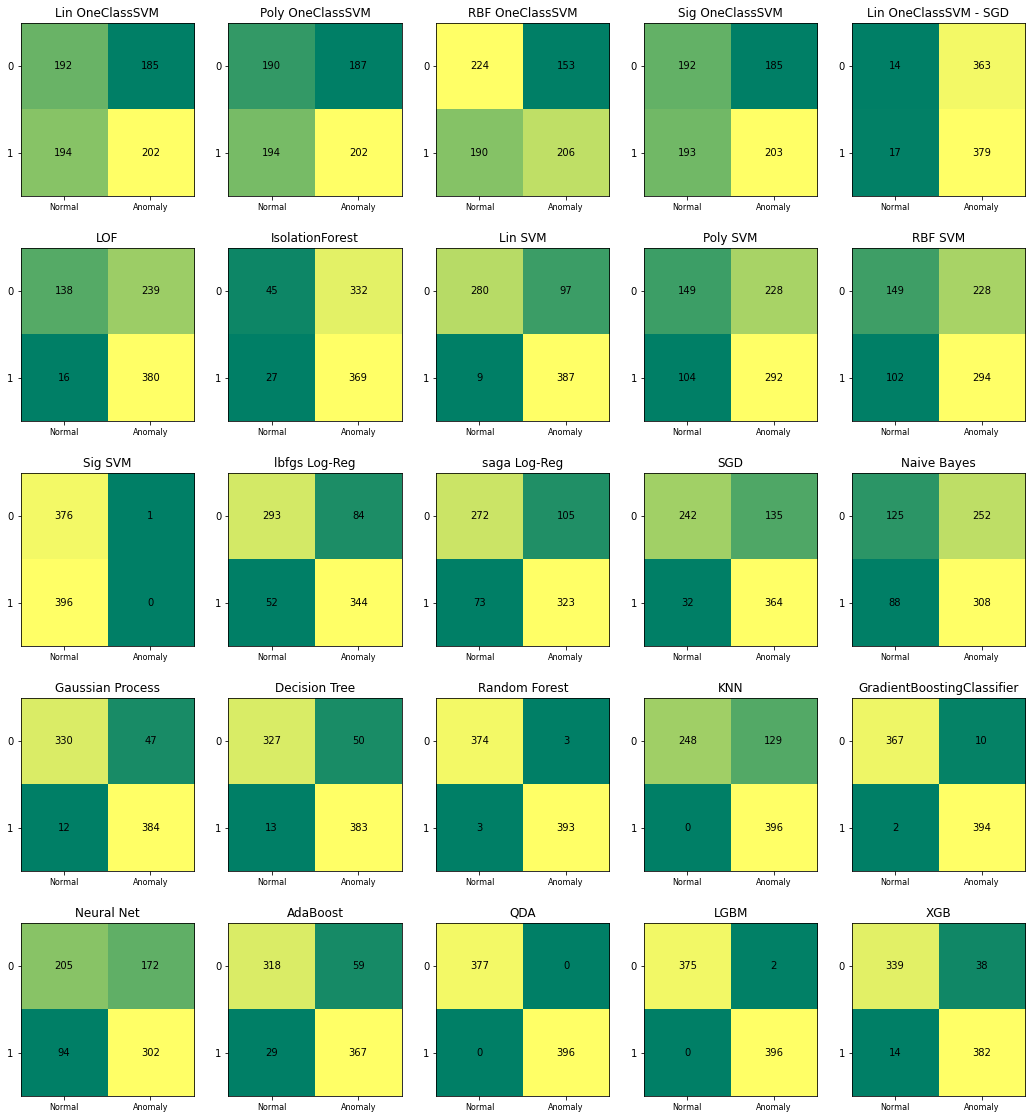

In [ ]:
Metrics = runML()

#### **Results**

In [ ]:
result = pd.DataFrame(Metrics.values(), columns =['Training-time', 'Prediction-time', 'Accuracy'])
result.index = Metrics.keys()

print("\nClassifier for which max Accuracy is obtained:")
print(result.loc[result["Accuracy"].idxmax()])

print("\n\nClassifier for which min Training-time is obtained:")
print(result.loc[result["Training-time"].idxmin()])

print("\n\nClassifier for which min Prediction-time is obtained:")
print(result.loc[result["Prediction-time"].idxmin()])

print("\n\nResults of all the Classifiers:")
result.sort_values(by="Accuracy", ascending=False)


Classifier for which max Accuracy is obtained:
Training-time        0.990178
Prediction-time      0.067283
Accuracy           100.000000
Name: QDA, dtype: float64


Classifier for which min Training-time is obtained:
Training-time       0.008269
Prediction-time     0.182106
Accuracy           83.311772
Name: KNN, dtype: float64


Classifier for which min Prediction-time is obtained:
Training-time       0.034339
Prediction-time     0.005935
Accuracy           50.840880
Name: Lin OneClassSVM - SGD, dtype: float64


Results of all the Classifiers:


,Training-time,Prediction-time,Accuracy
QDA,0.990178,0.067283,100.000000
LGBM,13.374086,0.016873,99.741268
Random Forest,7.830748,0.027998,99.223803
GradientBoostingClassifier,110.791965,0.014699,98.447607
XGB,12.522847,0.017378,93.272962
Gaussian Process,15.278801,2.528587,92.367400
Decision Tree,3.349145,0.006808,91.849935
AdaBoost,14.930097,0.057314,88.615783
Lin SVM,1.900675,0.382161,86.287193
KNN,0.008269,0.182106,83.311772


---

##  ***Environment Specs & Details*** 

In [ ]:
#@title
#cpu
split_bar = '='*20
print(f"{split_bar} CPU {split_bar}")
cpu_info = !lscpu
for inf_item in cpu_info.get_list():
  print(inf_item)

==================== CPU ====================
Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hy

In [ ]:
#@title
print(f"{split_bar} RAM {split_bar}")
!free -h #ram
print(f"{split_bar} CUDA {split_bar}")
!nvcc --version #cuda

==================== RAM ====================
              total        used        free      shared  buff/cache   available
Mem:            12G        884M        8.5G        1.3M        3.3G         11G
Swap:            0B          0B          0B
==================== CUDA ====================
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
#@title
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
!nvidia-smi

/device:GPU:0
Num GPUs Available:  1
Fri Sep 23 23:22:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    324MiB / 15109MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                   